In [2]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

import warnings 
warnings.simplefilter(action='ignore')

## Recap

- In slides

## New material (part 1)

### What is meant by the distribution of the sample mean?

- Remember that we consider the United Airlines dataset to be the population of all United Airlines flights which departed from San Franisco in a two month period.
- We are using this dataset as a teaching tool to empirically verify the results we discuss in the text and slides.

In [8]:
united = Table.read_table('united.csv')

In [9]:
united.sample(6,with_replacement = False).show()

Date,Flight Number,Destination,Delay
7/4/15,1018,IAH,41
6/9/15,1182,LAX,56
7/7/15,1185,EWR,222
7/21/15,1586,ORD,-10
8/10/15,479,LAX,-4
7/25/15,637,JFK,-2


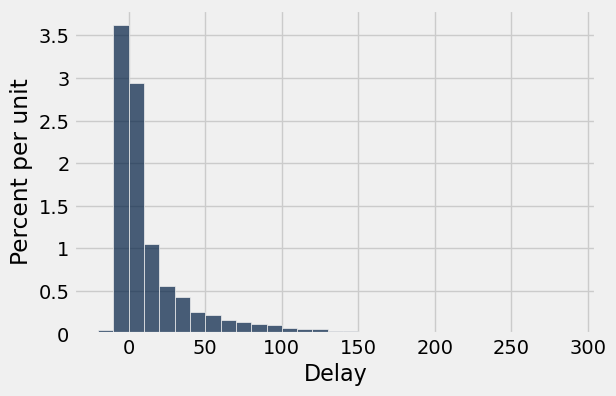

In [10]:
united_bins = np.arange(-20, 300, 10)
united.hist('Delay', bins=united_bins)

Population parameters:

In [11]:
population_mean = np.average(united.column("Delay"))
population_mean

16.658155515370705

In [12]:
population_sd = np.std(united.column("Delay"))
population_sd

39.480199851609314

Functions from yesterday:

In [13]:
def one_sample_mean(sample_size):
    """Take a sample from the population of flights and compute its mean"""
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [14]:
def ten_thousand_sample_means(sample_size):
    """Approximate the distribution of the sample mean"""
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

**Task**: 
- Obtain ten thousand sample means, each being acquired from a sample of size 400.
- Plot these on a histogram, and demarcate also the population mean.

In [15]:
sample_means_400 = ten_thousand_sample_means(400)
sample_averages_average=np.average(sample_means_400)
sample_averages_average

16.655030249999999

Population Average: 16.6581555154


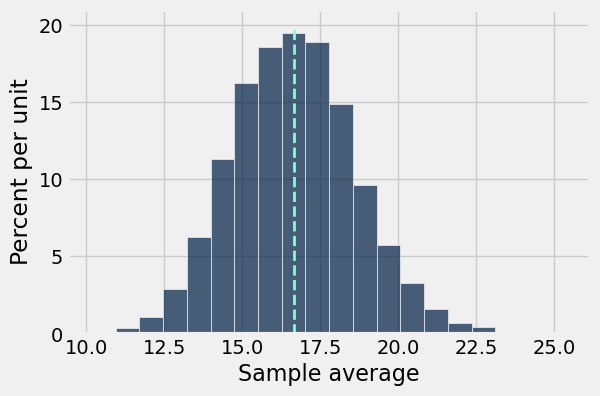

In [16]:
t=Table().with_column('Sample average', sample_means_400)
t.hist(bins=20)
plots.plot((population_mean, population_mean), (0, 0.2), color='aquamarine', lw=2,ls='--')
print('Population Average:', population_mean)

**Task**: 
- Obtain ten thousand sample means, each being acquired from a sample of size 900.
- Plot these on a histogram along with the ten thousand sample means of size 400
- Demarcate also the population mean.

In [17]:
sample_means_900 = ten_thousand_sample_means(900)

In [18]:
means_tbl = Table().with_columns(
    '400', sample_means_400,
    '900', sample_means_900,
)

Population Average: 16.6581555154


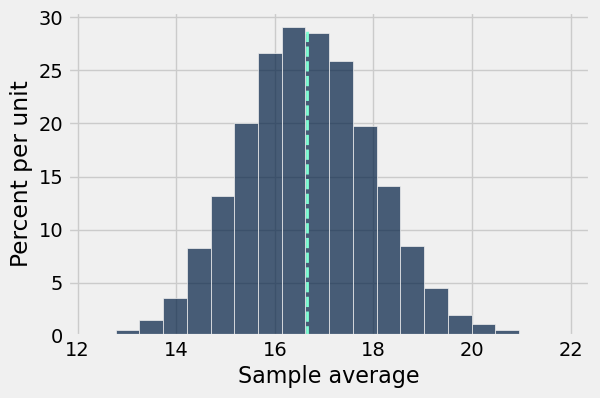

In [25]:
t=Table().with_column('Sample average', sample_means_900)
t.hist(bins=20)
plots.plot((population_mean, population_mean), (0, 0.29), color='aquamarine', lw=2,ls='--')
print('Population Average:', population_mean)

Let's superimpose both empirical sampling distributions together!

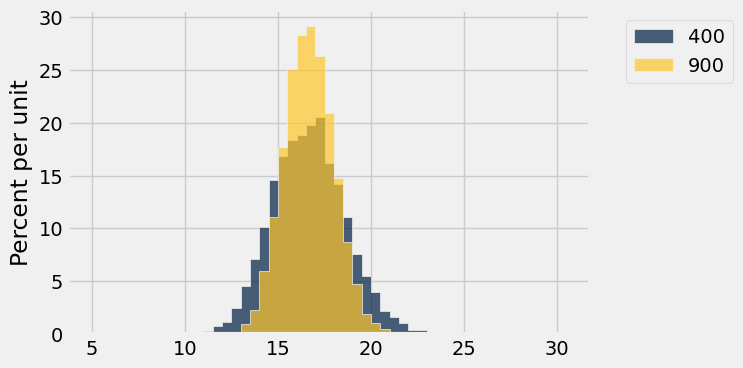

In [19]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))

### Can we quantify the 'relationship' between the width of the bell shape and sample size?

**Task**: 
- Obtain ten thousand sample means, each being acquired from a sample size that we choose.
- Plot these on a histogram.
- Calculate/reference a few quantites of interest:
    - population standard deviation
    - standard deviation of the sample means
- See if we can pick up on a pattern!

In [26]:
def plot_sample_means(sample_size):
    """Empirical distribution of random sample means"""
    sample_means = ten_thousand_sample_means(sample_size)
    sample_means_tbl = Table().with_column('Sample Means', sample_means)
    
    # Print some information about the distribution of the sample means
    print("Population SD:", population_sd)
    print("SD of sample means:", np.std(sample_means))
    print("Population SD / SD of sample means:",population_sd/ np.std(sample_means))
    # Plot a histogram of the sample means
    sample_means_tbl.hist(bins=20)
    plots.xlabel('Sample Means')

Population SD: 39.4801998516
SD of sample means: 3.91501200123
Population SD / SD of sample means: 10.0843113225


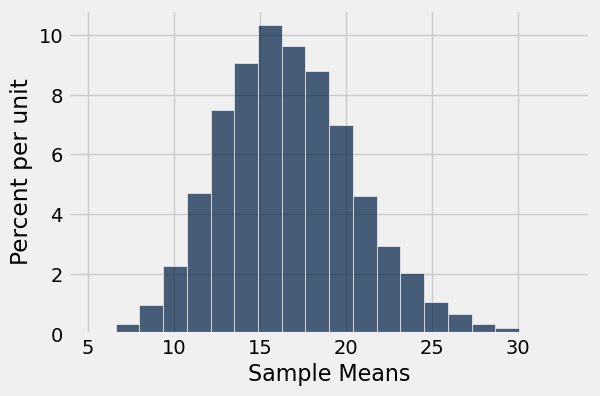

In [27]:
plot_sample_means(100)

Population SD: 39.4801998516
SD of sample means: 1.97004535389
Population SD / SD of sample means: 20.0402492123


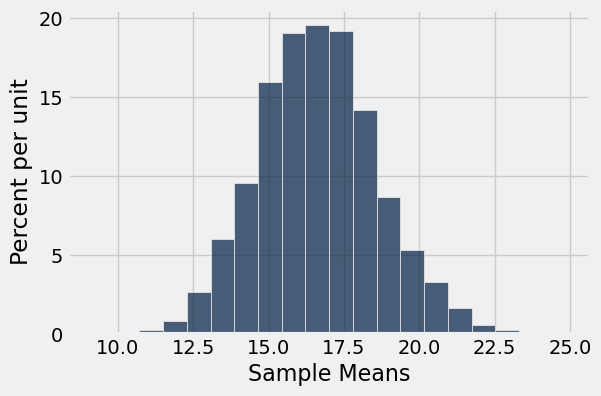

In [28]:
plot_sample_means(400)

Population SD: 39.4801998516
SD of sample means: 1.56956024755
Population SD / SD of sample means: 25.1536695793


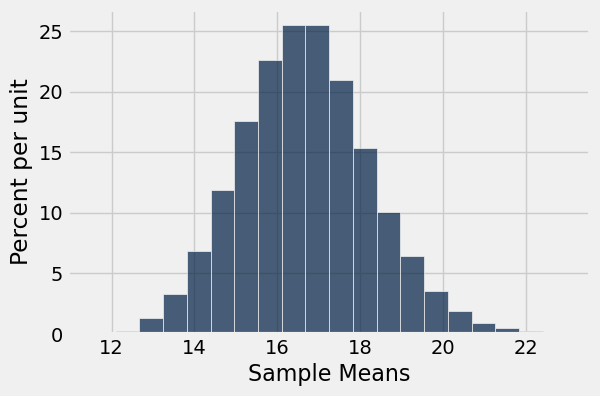

In [29]:
plot_sample_means(625)

#### The trend above we are seeing is...

$$\frac{\text{population SD}}{\text{SD of sample means}} = \sqrt{\text{sample size}}$$

#### Now, let's solve for the SD of the sample means...

$$\text{SD of sample means} = \frac{\text{population SD}}{\sqrt{\text{sample size}}}$$

_______

The cell below will take a while to run.

In [30]:
sample_sizes = np.arange(100, 950, 50)

sample_mean_sds = make_array()
for n in sample_sizes:
    sample_means = ten_thousand_sample_means(n)
    sample_mean_sds = np.append(sample_mean_sds, np.std(sample_means))

In [ ]:
sd_table = Table().with_columns(
    'Sample size', sample_sizes,
    'SD of simulated sample means', sample_mean_sds,
    'Pop SD / sqrt(sample size)', population_sd / np.sqrt(sample_sizes),
)
sd_table

In [ ]:
sd_table.scatter('Sample size')

## New material (part 2)

### Choosing a sample size given an interval width

In [3]:
number_of_ones = 2
zero_one_population = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))

print('Standard Deviation:', np.round(np.std(zero_one_population),2))

zero_one_population

Standard Deviation: 0.4


array([ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [4]:
def sd_of_zero_one_population(number_of_ones):
    """Returns the SD of a population 
    that has 10 elements: num_ones with value 1 and (10 - num_ones) with value 0"""
    zero_one_population = np.append(np.ones(number_of_ones), 
                                    np.zeros(10 - number_of_ones))
    return np.std(zero_one_population)

In [5]:
possible_ones = np.arange(11)
zero_one_pop = Table().with_columns(
    'Number of Ones', possible_ones,
    'Proportion of Ones', possible_ones / 10
)
zero_one_pop.show()

Number of Ones,Proportion of Ones
0,0
1,0.1
2,0.2
3,0.3
4,0.4
5,0.5
6,0.6
7,0.7
8,0.8
9,0.9


In [6]:
sds = zero_one_pop.apply(sd_of_zero_one_population, 'Number of Ones')
zero_one_pop = zero_one_pop.with_column('Pop SD', sds)
zero_one_pop.show()

Number of Ones,Proportion of Ones,Pop SD
0,0,0
1,0.1,0.3
2,0.2,0.4
3,0.3,0.458258
4,0.4,0.489898
5,0.5,0.5
6,0.6,0.489898
7,0.7,0.458258
8,0.8,0.4
9,0.9,0.3


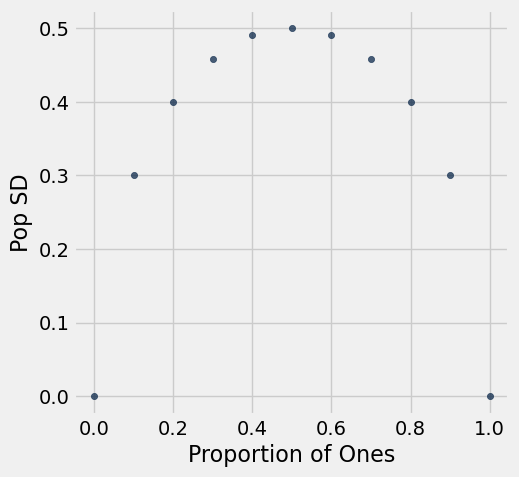

In [7]:
zero_one_pop.scatter('Proportion of Ones', 'Pop SD')